# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/breast_cancer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/breast_cancer.parquet')

In [5]:
y_train = train.diagnosis
X_train = train.drop(columns=['diagnosis'])

In [6]:
y_validation = validation.diagnosis
X_validation = validation.drop(columns=['diagnosis'])

In [22]:
exploratory_depths = [1, 10, 20, 30, 50]
exploratory_estimators = [5, 10, 20, 30, 50, 100, 200, 500, 1000]

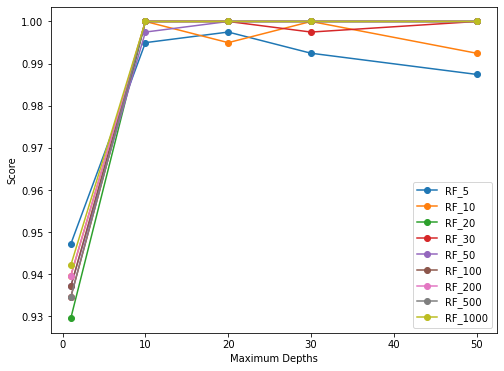

In [43]:
plt.figure(figsize=(8, 6))

for n in exploratory_estimators:
    plt.plot(exploratory_depths, [RandomForestClassifier(n_estimators=n, max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='RF_'+str(n))
    
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.legend()
plt.show()

In terms of maximum depths, it isn't interesting to compute forests with too deep trees (depths higher than 20). About number of estimators, from 50 and above it is not worth looking further.

In [50]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 20, 25]
n_estimators = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [51]:
models_list = []
names_list = []
for n in n_estimators:
    for i in max_depth:
        models_list.append(RandomForestClassifier(n_estimators=n, max_depth=i))
        names_list.append('RF_'+str(n)+'_'+str(i))

In [53]:
metrics = classification(models_list, names_list, '../../../data/metrics/breast_cancer/random_forest.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
RF_1_1,0.018948,0.859703,0.901942,4.913297
RF_1_3,0.017953,0.974513,0.936090,-3.942793
RF_1_5,0.015956,0.990613,0.949561,-4.144057
RF_1_7,0.011971,0.982777,0.910714,-7.332566
RF_1_10,0.010970,0.969806,0.884712,-8.774390
...,...,...,...,...
RF_50_10,0.113700,1.000000,0.992481,-0.751880
RF_50_12,0.121648,1.000000,0.990915,-0.908521
RF_50_15,0.116719,1.000000,0.989975,-1.002506
RF_50_20,0.122200,1.000000,0.994361,-0.563910


In [56]:
metrics.sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
RF_15_7,0.052859,1.000000,0.998120,-0.187970
RF_30_20,0.074282,1.000000,0.995301,-0.469925
RF_35_15,0.086766,1.000000,0.995301,-0.469925
RF_30_25,0.072805,1.000000,0.995301,-0.469925
RF_50_20,0.122200,1.000000,0.994361,-0.563910
...,...,...,...,...
RF_1_7,0.011971,0.982777,0.910714,-7.332566
RF_1_25,0.012953,0.972614,0.901942,-7.266199
RF_1_1,0.018948,0.859703,0.901942,4.913297
RF_1_15,0.012964,0.959938,0.893484,-6.922765


Let's test our best model: **RF_15_7**, that is, a Random Forest made up of 15 trees of maximum depth 7.

In [57]:
test = pd.read_parquet('../../../data/model_input/test_sets/breast_cancer.parquet')

In [58]:
y_test = test.diagnosis
X_test = test.drop(columns=['diagnosis'])

In [59]:
retrain = pd.concat([train, validation])

In [60]:
y_retrain = retrain.diagnosis
X_retrain = retrain.drop(columns=['diagnosis'])

In [61]:
model =RandomForestClassifier(n_estimators=15, max_depth=7).fit(X_retrain, y_retrain)

In [62]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9742


In [64]:
dump(model, 'best_random_forest.joblib')

['best_random_forest.joblib']

In [65]:
with open('../../../data/metrics/breast_cancer/final_AUC.txt', 'a') as f:
    f.write('\nRF, '+ str(auc))